In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
std = pd.read_csv('Students.csv')

In [6]:
std.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75


In [4]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
std.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
std.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
std = std.drop('Unnamed: 0',axis = 1)

In [10]:
std.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75


In [11]:
std['WklyStudyHours'] = std['WklyStudyHours'].str.replace('05-Oct','5-10')

In [12]:
std.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


#Gender Distribution

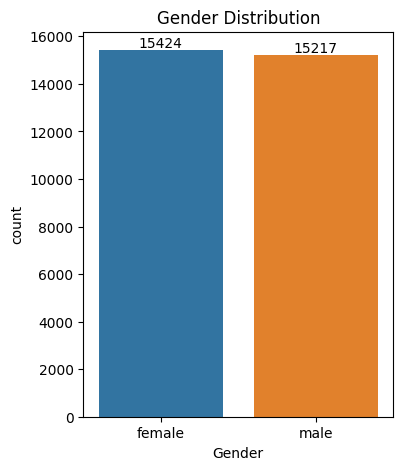

In [26]:
plt.figure(figsize = (4,5))
ax = sns.countplot(data = std, x = 'Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

In [ ]:
#From the above chart we have analyzed that:
#The number of females in the data is more than the number of males

#Impact of parents' education

In [21]:
gb = std.groupby('ParentEduc').agg({'MathScore':'mean', 'ReadingScore':'mean','WritingScore':'mean' })

In [22]:
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


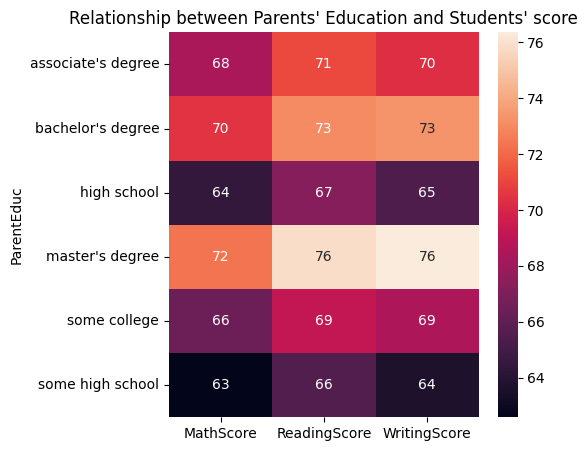

In [23]:
plt.figure(figsize = (5,5))
sns.heatmap(gb, annot = True)
plt.title("Relationship between Parents' Education and Students' score")
plt.show()

In [ ]:
#From the above chart we have concluded that the education of the parents have a good impact on students' scores

#Impact of parents' marital status

In [24]:
gb1 = std.groupby('ParentMaritalStatus').agg({'MathScore':'mean', 'ReadingScore':'mean','WritingScore':'mean' })
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


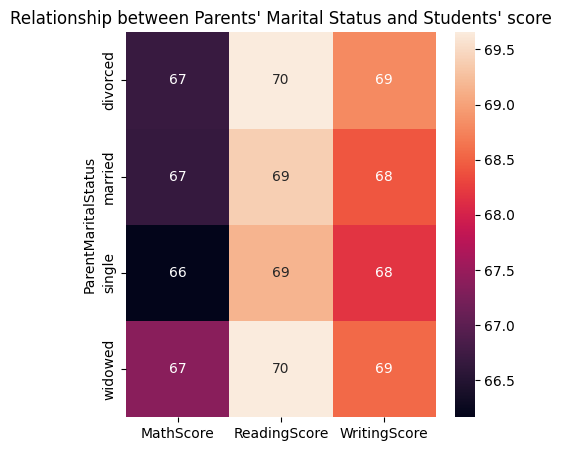

In [30]:
plt.figure(figsize = (5,5))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Parents' Marital Status and Students' score")
plt.show()

In [ ]:
#From the above chart we have concluded that the marital status of the parents' does not play a major role in the marks of their kids 

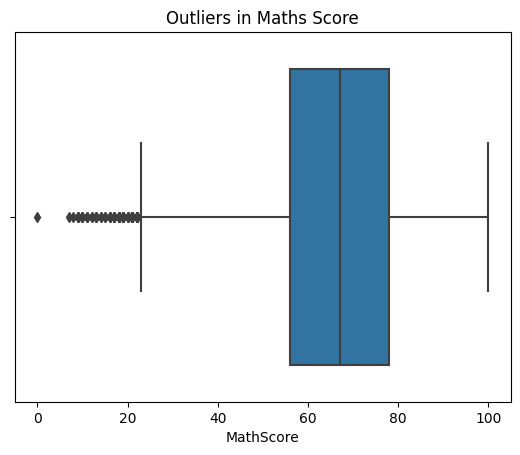

In [32]:
sns.boxplot(data = std, x= 'MathScore')
plt.title("Outliers in Maths Score")
plt.show()

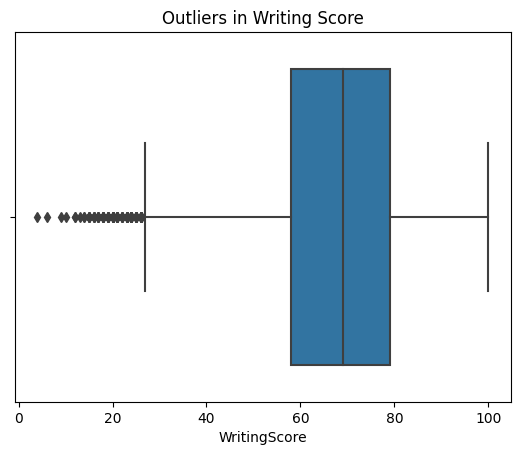

In [36]:
sns.boxplot(data = std, x= 'WritingScore')
plt.title("Outliers in Writing Score")
plt.show()

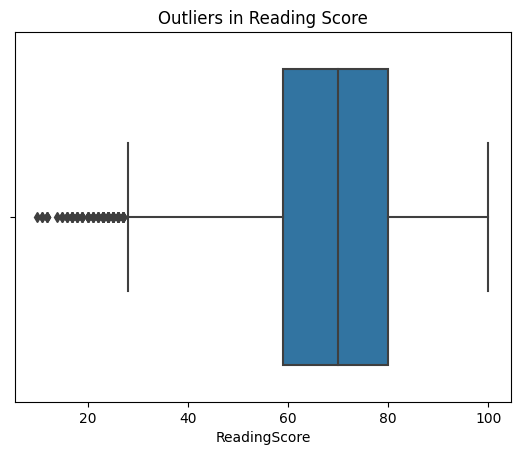

In [35]:
sns.boxplot(data = std, x= 'ReadingScore')
plt.title("Outliers in Reading Score")
plt.show()

In [ ]:
#Maths is a more difficult subject for the students as compared to reading and writing

In [37]:
std['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

#Distribution of Ethnic Groups

[2219, 5826, 9212, 7503, 4041]


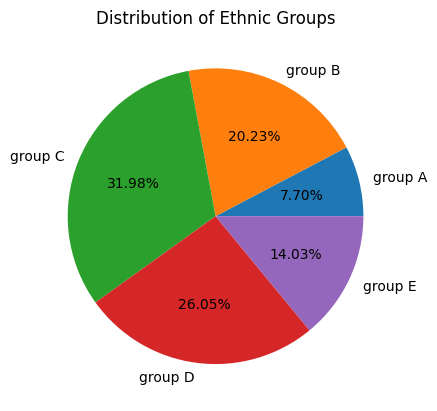

In [55]:
groupA = std.loc[(std['EthnicGroup'] == 'group A')].count()
groupB = std.loc[(std['EthnicGroup'] == 'group B')].count()
groupC = std.loc[(std['EthnicGroup'] == 'group C')].count()
groupD = std.loc[(std['EthnicGroup'] == 'group D')].count()
groupE = std.loc[(std['EthnicGroup'] == 'group E')].count()

l = ['group A', 'group B', 'group C', 'group D', 'group E']
mlist = [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup']]
print(mlist)

plt.pie(mlist, labels = l, autopct = '%1.2f%%')
plt.title("Distribution of Ethnic Groups")
plt.show()


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

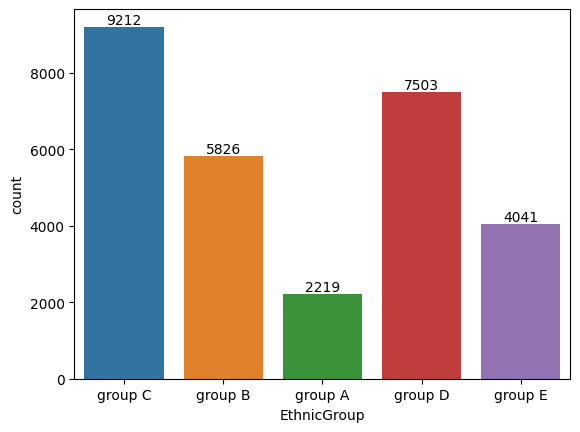

In [53]:
ax = sns.countplot(data = std, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])

#Impact of student's outdoor activities

In [7]:
am = std.groupby('PracticeSport').agg({'MathScore':'mean', 'ReadingScore':'mean','WritingScore':'mean' })

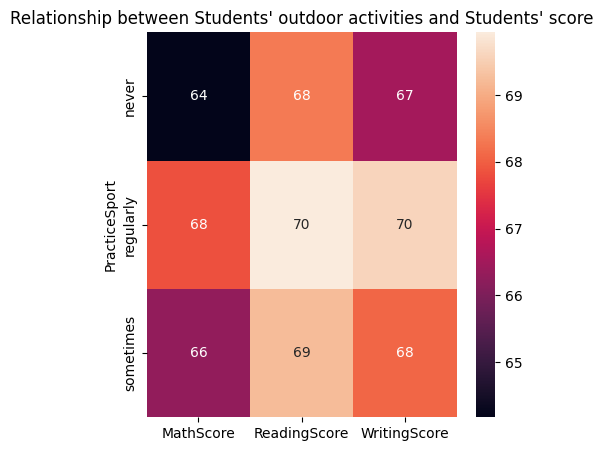

In [8]:
plt.figure(figsize = (5,5))
sns.heatmap(am, annot = True)
plt.title("Relationship between Students' outdoor activities and Students' score")
plt.show()

In [ ]:
#From the above heatmap we have observed that students who play sports regularly tend to score more marks than the ones who practice sports sometimes and never

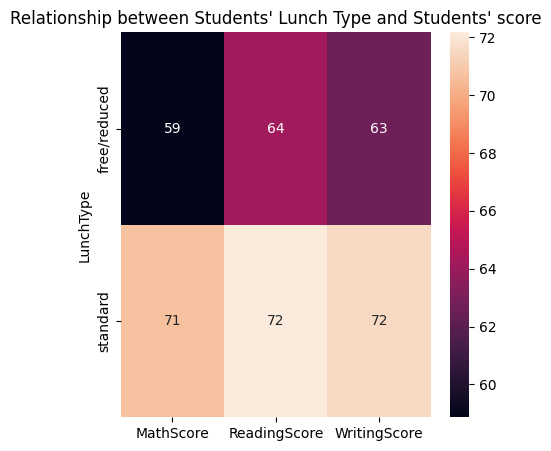

In [10]:
an = std.groupby('LunchType').agg({'MathScore':'mean', 'ReadingScore':'mean','WritingScore':'mean' })
plt.figure(figsize = (5,5))
sns.heatmap(an, annot = True)
plt.title("Relationship between Students' Lunch Type and Students' score")
plt.show()

In [ ]:
#From the above heat map we can clearly see that the students with standard lunch type score much higher than the ones with reduced lunch

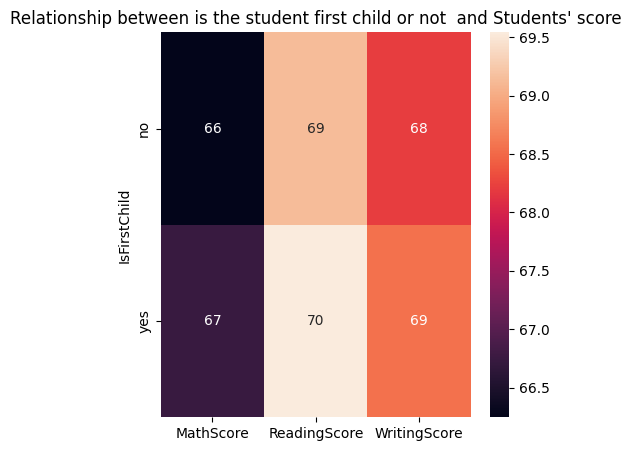

In [19]:
ab = std.groupby('IsFirstChild').agg({'MathScore':'mean', 'ReadingScore':'mean','WritingScore':'mean' })
plt.figure(figsize = (5,5))
sns.heatmap(ab, annot = True)
plt.title("Relationship between is the student first child or not  and Students' score")
plt.show()

In [ ]:
#There is no significant impact of the student being first child and their marks

Conclusion:
1) We have observed that there are more female students than male students
2) If the parents are educated then the students score more marks
3) Students' diet plays a huge role in scoring marks as the ones with good diet scored more
4) Outdoor activities also effect the overall personality of the kids and help them score good marks
5) Maths is a relatively more difficult subject for students, it should be worked upon by both teachers and students

Thank You!